# 데이터 불러오기

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from matplotlib import font_manager, rc

#datafirst = pd.read_csv('C:/Users/user/Desktop/11~12 이천시/data/19.03~21.02concat.csv')
datafirst = pd.read_csv('C:/Users/user/Desktop/11~12 이천시/data/data.csv', encoding = 'cp949')
datasecond = pd.read_excel('C:/Users/user/Desktop/11~12 이천시/data/종관기상관측DB.xlsx')
datathird = pd.read_excel('C:/Users/user/Desktop/11~12 이천시/data/미세먼지관측소.xlsx')

C:\Users\user\AppData\Local\Temp/ipykernel_536/3746170371.py:9: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  datathird = pd.read_excel('C:/Users/user/Desktop/11~12 이천시/data/미세먼지관측소.xlsx')


# 2019~2021.02 일별데이터 상관분석

후안1리마을회관


C:\Users\user\AppData\Local\Temp/ipykernel_17324/3903455769.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['측정일시'] = pd.to_datetime(df['측정일시'])


<AxesSubplot:title={'center':'후안1리마을회관'}>

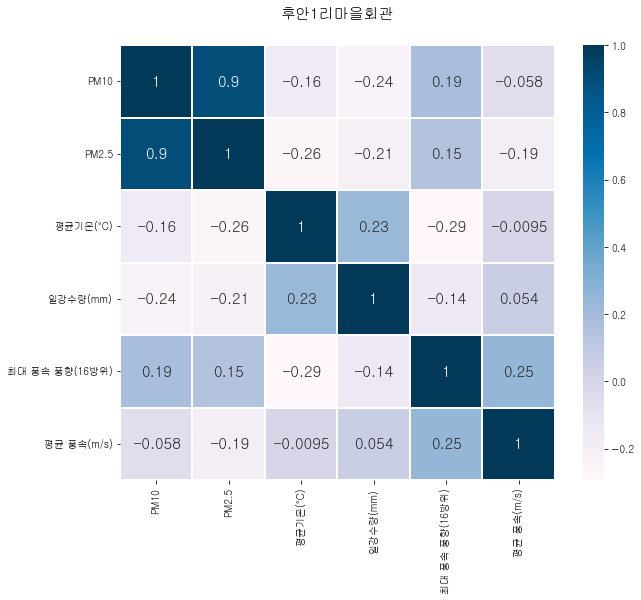

In [56]:
name = input()
# df = datafirst[datafirst['장치명'] == name]
# df['데이터 수집 시간'] = pd.to_datetime(df['데이터 수집 시간'])
# df = df.groupby('데이터 수집 시간').mean()
# df = df['미세먼지 (ug/m)']
df = datafirst[datafirst['측정장소'] == name]
df['측정일시'] = pd.to_datetime(df['측정일시'])
df = df.groupby('측정일시').mean()
df = df[['PM10','PM2.5']]
dt = datasecond.set_index('일시')
result = pd.merge(df, dt, how="outer", left_index=True, right_index=True)
result1= result.dropna(subset=["PM10"])
result1= result1.dropna(subset=["PM2.5"])

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from matplotlib import font_manager, rc

dts = result1

heatmap_data = dts[["PM10","PM2.5","평균기온(°C)","일강수량(mm)", "최대 풍속 풍향(16방위)","평균 풍속(m/s)"]]
# heatmap_data = heatmap_data.dropna(axis=0)
heatmap_data = heatmap_data.fillna(0)
heatmap_data
heatmap_data = heatmap_data.iloc[:,0:].astype(float)
heatmap_data.iloc[:,3] = heatmap_data.iloc[:,3].astype(str)
colormap = plt.cm.PuBu
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize=(10, 8))
plt.title(name, y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 15})

# 계절별 데이터 상관분석

측정장소 :  후안1리마을회관
계절 :  봄


<AxesSubplot:title={'center':'(계절 : 봄) 측정장소 : 후안1리마을회관'}>

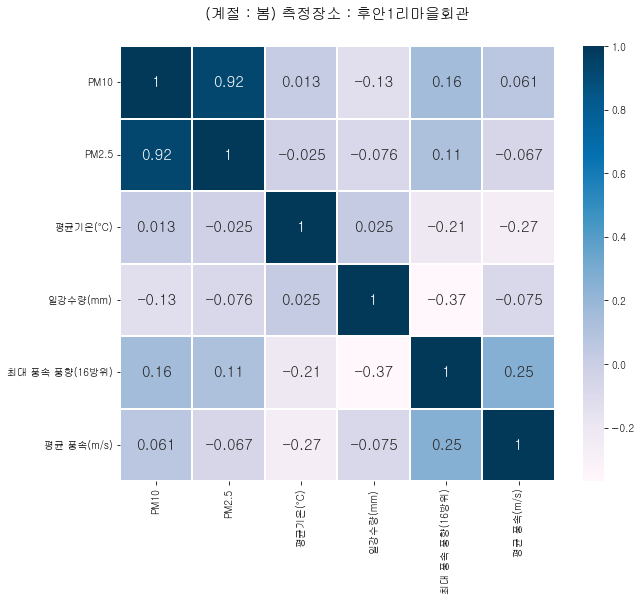

In [2]:
name = input('측정장소 : ')
name1 = input('계절 : ')
df = datathird[datathird['측정장소'] == name]
df = df[df['계절'] == name1]
df['측정일시'] = pd.to_datetime(df['측정일시'])
df = df.groupby('측정일시').mean()
df = df[['PM10','PM2.5']]
dt = datasecond.set_index('일시')
result = pd.merge(df, dt, how="outer", left_index=True, right_index=True)
result1= result.dropna(subset=["PM10"])
result1= result1.dropna(subset=["PM2.5"])

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from matplotlib import font_manager, rc

dts = result1

heatmap_data = dts[["PM10","PM2.5","평균기온(°C)","일강수량(mm)", "최대 풍속 풍향(16방위)","평균 풍속(m/s)"]]
# heatmap_data = heatmap_data.dropna(axis=0)
heatmap_data = heatmap_data.fillna(0)
heatmap_data
heatmap_data = heatmap_data.iloc[:,0:].astype(float)
heatmap_data.iloc[:,3] = heatmap_data.iloc[:,3].astype(str)
colormap = plt.cm.PuBu
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize=(10, 8))
plt.title('(계절 : '+name1+') 측정장소 : '+name, y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 15})


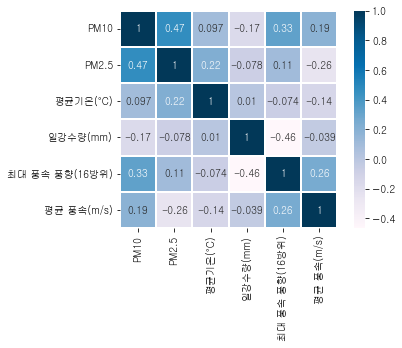

In [257]:
# hm = sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})
# hm.get_figure().savefig("C:/Users/user/Desktop/11~12 이천시/result/"+'(계절_'+name1+') 측정장소_'+name+'.png')